In [1]:
import pandas as pd
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_valid_images_path = '/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/train_valid'

In [4]:
train_valid_df = pd.read_csv('/content/drive/MyDrive/AI Indonesia/Project 1/train_valid_dataset.csv')
train_valid_df

,file_name,male,gender
0,000051.jpg,1,Male
1,000052.jpg,1,Male
2,000065.jpg,1,Male
3,000166.jpg,1,Male
4,000198.jpg,-1,Female
...,...,...,...
4495,202320.jpg,-1,Female
4496,202340.jpg,-1,Female
4497,202347.jpg,-1,Female
4498,202357.jpg,-1,Female


In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize image
    validation_split=0.2222,  # Use 20% of data for validation
    # Add any other augmentations here
)

In [6]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_valid_df,
    directory=train_valid_images_path,  # Directory where images are stored
    x_col='file_name',  # Column in DataFrame that contains the filenames
    y_col='gender',  # Column in DataFrame that contains the labels
    target_size=(224, 224),  # Size expected by VGG
    batch_size=32,
    class_mode='binary',  # For binary classification
    subset='training',  # Specify this is training data
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=train_valid_df,
    directory=train_valid_images_path,
    x_col='file_name',
    y_col='gender',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Specify this is validation data
)

Found 3501 validated image filenames belonging to 2 classes.
Found 999 validated image filenames belonging to 2 classes.


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Configure the checkpoint callback to save only the best model based on validation loss
checkpoint_filepath = '/content/drive/MyDrive/AI Indonesia/Project 1/Model/best_model_v2.h5'  # Adjust the file path as needed
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Set to True if you only want to save the weights, False to save the entire model
    save_best_only=True,  # Save only the best model according to the monitored metric
    monitor='val_loss',  # Monitor the validation loss
    mode='min',  # The model is saved when the quantity monitored has decreased
    verbose=1  # Logs a message when the best model is being saved
)


In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the VGG16 model, pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

# Create your own model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21156033 (80.70 MB)
Trainable params: 64

In [15]:
# Use the callback during training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[model_checkpoint_callback]  # Add the callback here
)

Epoch 1/30
110/110 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8632 
Epoch 1: val_loss improved from inf to 0.20611, saving model to /content/drive/MyDrive/AI Indonesia/Project 1/Model/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 2785s 25s/step - loss: 0.4118 - accuracy: 0.8632 - val_loss: 0.2061 - val_accuracy: 0.9159
Epoch 2/30
 39/110 [=========>....................] - ETA: 22:25 - loss: 0.1415 - accuracy: 0.9471

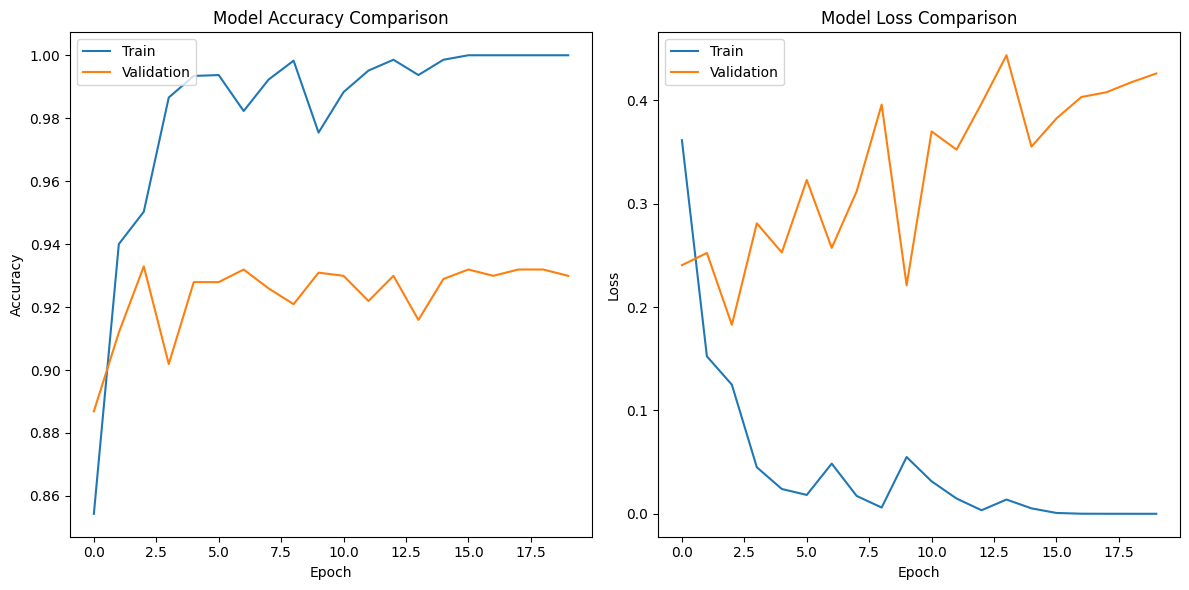

In [16]:
import matplotlib.pyplot as plt

# ... (kode lainnya seperti di atas)

# Train the model

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

## Model Testing & Evaluation

In [17]:
test_image_path = '/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/test'


In [18]:
test_df = pd.read_csv('/content/drive/MyDrive/AI Indonesia/Project 1/test_dataset.csv')
test_df

,file_name,male,gender
0,152825.jpg,1,Male
1,164266.jpg,1,Male
2,105355.jpg,1,Male
3,057759.jpg,1,Male
4,067072.jpg,1,Male
...,...,...,...
495,139932.jpg,-1,Female
496,195296.jpg,-1,Female
497,004557.jpg,-1,Female
498,028014.jpg,-1,Female


In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Apply the same normalization as training

test_generator = test_datagen.flow_from_directory(
    directory=test_image_path,  # Directory where images are stored
    target_size=(224, 224),  # Same as training
    batch_size=32,  # Can be adjusted
    class_mode='binary',  # Or 'categorical', depending on your problem
    shuffle=False  # To keep data in order for evaluation
)


Found 500 images belonging to 2 classes.


In [20]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


16/16 [==============================] - 55s 4s/step - loss: 0.6262 - accuracy: 0.9100
Test Loss: 0.6261909604072571
Test Accuracy: 0.9100000262260437


In [21]:
predictions = model.predict(test_generator, steps=len(test_generator))
# Process predictions (e.g., apply threshold for binary classification)

16/16 [==============================] - 3s 143ms/step


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming binary classification and threshold of 0.5 for predictions
predicted_classes = (predictions > 0.5).astype(int)
true_classes = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices)
print(report)

[[276  19]
 [ 26 179]]
              precision    recall  f1-score   support

      Female       0.91      0.94      0.92       295
        Male       0.90      0.87      0.89       205

    accuracy                           0.91       500
   macro avg       0.91      0.90      0.91       500
weighted avg       0.91      0.91      0.91       500



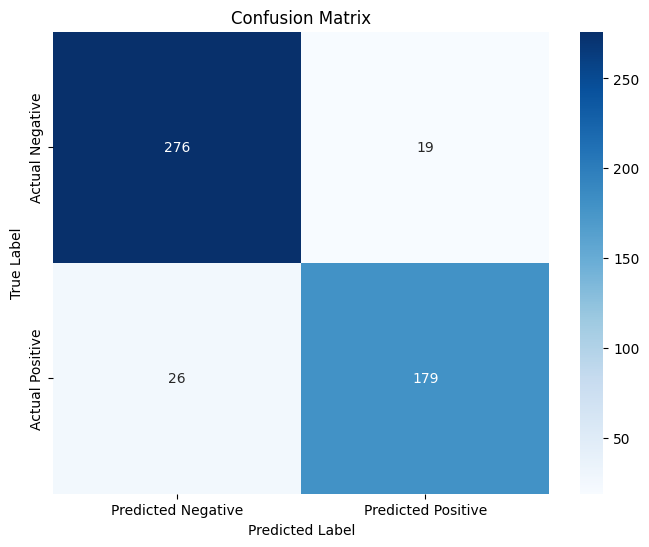

In [23]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/AI Indonesia/Project 1/Model/best_model_v2.h5')

def inference_test(img_path):
  # Load and preprocess the image
  img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size based on your model's expected input
  img_array = image.img_to_array(img)  # Convert the PIL Image to a numpy array
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  img_preprocessed = img_array_expanded_dims / 255.
  # Make a prediction
  prediction = model.predict(img_preprocessed)

  # Define threshold for binary classification
  threshold = 0.5
  predicted_class = "Male" if prediction >= threshold else "Female"
  confidence = prediction[0][0] if predicted_class == "Male" else 1 - prediction[0][0]
  # if prediction[0][0] > prediction[0][1]:
  #     print("Male")
  # else:
  #     print('Female')
  print(prediction)
  # Visualization
  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}, Confidence: {confidence:.2f}')
  plt.axis('off')  # Hide axes to focus on the image
  plt.show()

1/1 [==============================] - 0s 162ms/step
[[0.0812772]]


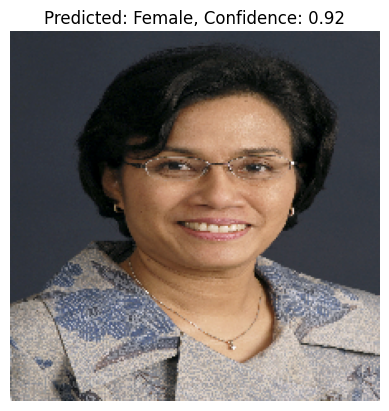

In [45]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/Indrawati,_Sri_Mulyani_(IMF).jpg')

1/1 [==============================] - 0s 24ms/step
[[0.74449444]]


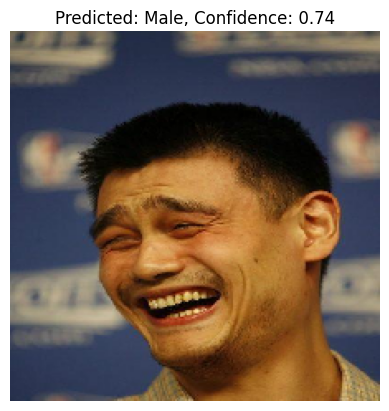

In [46]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/yaoming.jpg')

1/1 [==============================] - 0s 41ms/step
[[0.8283834]]


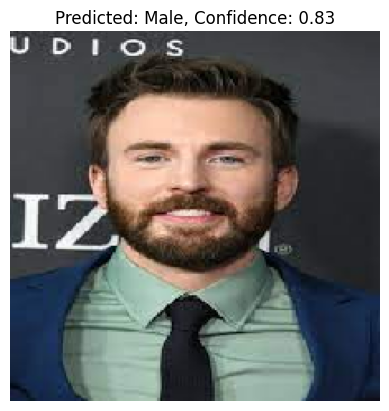

In [47]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/chris evansjpg.jpg')

1/1 [==============================] - 0s 33ms/step
[[0.23435856]]


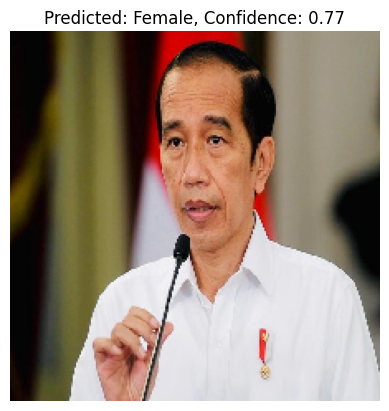

In [48]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/jokowi.jpeg')

1/1 [==============================] - 0s 18ms/step
[[0.38106084]]


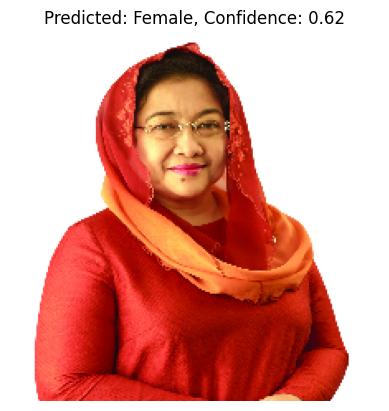

In [49]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/President_Megawati_Soekarnoputri_-_Indonesia.jpg')

1/1 [==============================] - 0s 19ms/step
[[0.00446378]]


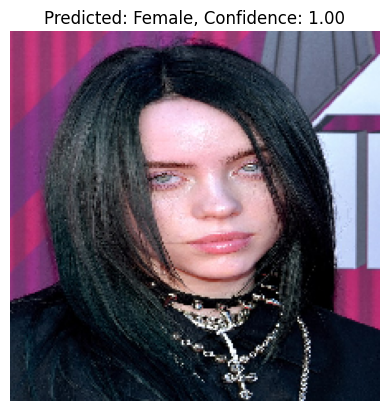

In [50]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/Billie_Eilish.jpg')

1/1 [==============================] - 0s 26ms/step
[[0.02544361]]


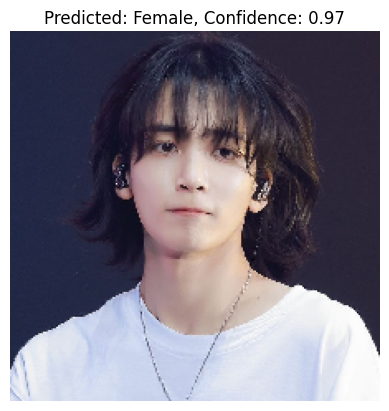

In [51]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/jeonghan.jpg')

1/1 [==============================] - 0s 19ms/step
[[0.06855363]]


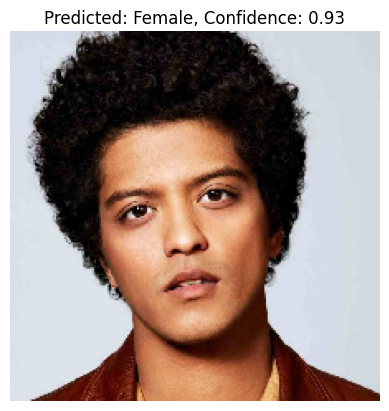

In [52]:
inference_test('/content/drive/MyDrive/AI Indonesia/Project 1/Dataset/Inference_test/bruno_mars.jpeg')